In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

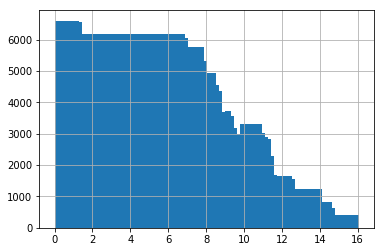

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


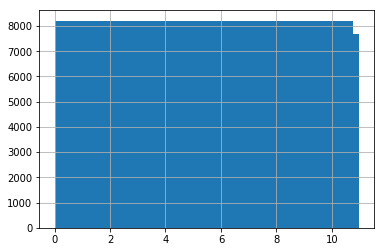

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [27]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [28]:
GNO=203
!mkdir -p input/sub/{GNO}

In [29]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/203'

In [30]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [31]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [32]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'fair',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [33]:
best_mae=1e10

In [34]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf,
          fair_c,seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [35]:
best={'colsample_bytree': 0.6451514050646995,
 'fair_c': 0.7277079006514405,
 'learning_rate': 0.002644075119419426,
 'max_depth': 4.689630529444919,
 'min_data_in_leaf': 526.6028978484759,
 'min_sum_hessian_in_leaf': 0.019123810510874733,
 'num_leaves': 67.66220364033194,
 'reg_alpha': 1.0266272254897302,
 'reg_lambda': 6.1335362892235565,
 'subsample': 0.41274807543837455}

In [36]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    print 'seed',randseed
    best['seed']=randseed
    a=lgbcv(**best)
    scores.append(a)

seed 9074997
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)


/home/hadoop/miniconda2/lib/python2.7/site-packages/lightgbm/sklearn.py:258: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)


Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.77301	valid_1's l1: 1.91402
[200]	training's l1: 1.43782	valid_1's l1: 1.64239
[300]	training's l1: 1.27451	valid_1's l1: 1.49432
[400]	training's l1: 1.18457	valid_1's l1: 1.40161
[500]	training's l1: 1.13178	valid_1's l1: 1.33729
[600]	training's l1: 1.0989	valid_1's l1: 1.29257
[700]	training's l1: 1.07733	valid_1's l1: 1.26209
[800]	training's l1: 1.06255	valid_1's l1: 1.24061
[900]	training's l1: 1.05175	valid_1's l1: 1.22703
[1000]	training's l1: 1.0436	valid_1's l1: 1.21726
[1100]	training's l1: 1.03673	valid_1's l1: 1.21004
[1200]	training's l1: 1.03082	valid_1's l1: 1.2053
[1300]	training's l1: 1.02591	valid_1's l1: 1.20156
[1400]	training's l1: 1.02095	valid_1's l1: 1.19939
[1500]	training's l1: 1.01635	valid_1's l1: 1.1983
[1600]	training's l1: 1.01225	valid_1's l1: 1.19751
[1700]	training's l1: 1.00868	valid_1's l1: 1.19653
[1800]	training's l1: 1.00561	valid_1's l1: 1.19577
[1900]	trainin

[600]	training's l1: 1.09805	valid_1's l1: 1.29617
Early stopping, best iteration is:
[559]	training's l1: 1.10997	valid_1's l1: 1.29614
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q8_a11_s9074997.csv
quake  8 (1.296144474325494, 559)
valid quake 9
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.79479	valid_1's l1: 1.69202
[200]	training's l1: 1.46148	valid_1's l1: 1.29017
[300]	training's l1: 1.29915	valid_1's l1: 1.1004
[400]	training's l1: 1.20895	valid_1's l1: 1.00085
[500]	training's l1: 1.15519	valid_1's l1: 0.946974
[600]	training's l1: 1.12156	valid_1's l1: 0.917835
[700]	training's l1: 1.099	valid_1's l1: 0.90435
[800]	training's l1: 1.08312	valid_1's l1: 0.898232
[900]	training's l1: 1.07165	valid_1's l1: 0.895264
[1000]	training's l1: 1.06289	valid_1's l1: 0.894192
[1100]	training's l1: 1.05575	valid_1's l1: 0.893782
[1200]	training's l1: 1.04972	valid_1's l1: 0.893477
Early stoppin

[2000]	training's l1: 0.999991	valid_1's l1: 1.19605
[2100]	training's l1: 0.997	valid_1's l1: 1.19578
[2200]	training's l1: 0.994106	valid_1's l1: 1.19551
Early stopping, best iteration is:
[2185]	training's l1: 0.994516	valid_1's l1: 1.19544
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q1_a11_s3386463.csv
quake  1 (1.1954367918746722, 2185)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.76713	valid_1's l1: 1.93803
[200]	training's l1: 1.43145	valid_1's l1: 1.67706
[300]	training's l1: 1.2676	valid_1's l1: 1.54384
[400]	training's l1: 1.17633	valid_1's l1: 1.46566
[500]	training's l1: 1.12292	valid_1's l1: 1.41781
[600]	training's l1: 1.09009	valid_1's l1: 1.38533
[700]	training's l1: 1.06831	valid_1's l1: 1.3625
[800]	training's l1: 1.05322	valid_1's l1: 1.34692
[900]	training's l1: 1.04245	valid_1's l1: 1.33636
[1000]	training's l1: 1.03403	valid_1's l1: 1.32914
[1100]	trainin

[400]	training's l1: 1.2087	valid_1's l1: 0.99935
[500]	training's l1: 1.15526	valid_1's l1: 0.945846
[600]	training's l1: 1.12175	valid_1's l1: 0.917298
[700]	training's l1: 1.09927	valid_1's l1: 0.9038
[800]	training's l1: 1.08335	valid_1's l1: 0.897728
[900]	training's l1: 1.07183	valid_1's l1: 0.894404
[1000]	training's l1: 1.06324	valid_1's l1: 0.892806
[1100]	training's l1: 1.05618	valid_1's l1: 0.89212
[1200]	training's l1: 1.04999	valid_1's l1: 0.892055
Early stopping, best iteration is:
[1119]	training's l1: 1.0549	valid_1's l1: 0.891996
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q9_a11_s3386463.csv
quake  9 (0.8919960056217, 1119)
valid quake 10
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.78859	valid_1's l1: 1.80306
[200]	training's l1: 1.4552	valid_1's l1: 1.44192
[300]	training's l1: 1.29191	valid_1's l1: 1.26854
[400]	training's l1: 1.20164	valid_1's l1: 1.17059
[500]	trainin

[700]	training's l1: 1.0685	valid_1's l1: 1.36343
[800]	training's l1: 1.05322	valid_1's l1: 1.34819
[900]	training's l1: 1.04218	valid_1's l1: 1.3374
[1000]	training's l1: 1.0341	valid_1's l1: 1.33027
[1100]	training's l1: 1.02753	valid_1's l1: 1.32454
[1200]	training's l1: 1.02144	valid_1's l1: 1.32088
[1300]	training's l1: 1.01623	valid_1's l1: 1.31785
[1400]	training's l1: 1.01169	valid_1's l1: 1.31491
[1500]	training's l1: 1.00759	valid_1's l1: 1.31327
[1600]	training's l1: 1.0036	valid_1's l1: 1.31274
[1700]	training's l1: 1.00029	valid_1's l1: 1.31195
[1800]	training's l1: 0.997105	valid_1's l1: 1.31114
[1900]	training's l1: 0.993982	valid_1's l1: 1.31046
[2000]	training's l1: 0.991183	valid_1's l1: 1.30969
[2100]	training's l1: 0.988404	valid_1's l1: 1.30909
[2200]	training's l1: 0.985505	valid_1's l1: 1.30871
[2300]	training's l1: 0.982841	valid_1's l1: 1.30864
Early stopping, best iteration is:
[2234]	training's l1: 0.984532	valid_1's l1: 1.30855
write to /home/hadoop/lanlep2

[800]	training's l1: 1.07741	valid_1's l1: 1.04103
[900]	training's l1: 1.06614	valid_1's l1: 1.03184
[1000]	training's l1: 1.05757	valid_1's l1: 1.0256
[1100]	training's l1: 1.05068	valid_1's l1: 1.02116
[1200]	training's l1: 1.04457	valid_1's l1: 1.01843
[1300]	training's l1: 1.03921	valid_1's l1: 1.01662
[1400]	training's l1: 1.03434	valid_1's l1: 1.01479
[1500]	training's l1: 1.03022	valid_1's l1: 1.01349
[1600]	training's l1: 1.02688	valid_1's l1: 1.01293
[1700]	training's l1: 1.02369	valid_1's l1: 1.01238
[1800]	training's l1: 1.02053	valid_1's l1: 1.01175
[1900]	training's l1: 1.01773	valid_1's l1: 1.01121
[2000]	training's l1: 1.01497	valid_1's l1: 1.01093
[2100]	training's l1: 1.01225	valid_1's l1: 1.01106
Early stopping, best iteration is:
[2042]	training's l1: 1.01385	valid_1's l1: 1.01083
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q10_a11_s5880231.csv
quake  10 (1.0108294397032311, 2042)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until 

[2200]	training's l1: 0.985246	valid_1's l1: 1.30655
[2300]	training's l1: 0.982346	valid_1's l1: 1.30632
Early stopping, best iteration is:
[2290]	training's l1: 0.982643	valid_1's l1: 1.30626
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q2_a11_s6401847.csv
quake  2 (1.3062605179155022, 2290)
valid quake 3
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.7977	valid_1's l1: 1.55208
[200]	training's l1: 1.4649	valid_1's l1: 1.1392
[300]	training's l1: 1.30203	valid_1's l1: 0.95406
[400]	training's l1: 1.21112	valid_1's l1: 0.869887
[500]	training's l1: 1.15712	valid_1's l1: 0.831254
[600]	training's l1: 1.12334	valid_1's l1: 0.817072
[700]	training's l1: 1.1006	valid_1's l1: 0.81461
[800]	training's l1: 1.08484	valid_1's l1: 0.815696
Early stopping, best iteration is:
[710]	training's l1: 1.09875	valid_1's l1: 0.814431
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q3_a11_s6401847.csv
quak

[1800]	training's l1: 1.02084	valid_1's l1: 1.01278
[1900]	training's l1: 1.01812	valid_1's l1: 1.01222
[2000]	training's l1: 1.01551	valid_1's l1: 1.0118
[2100]	training's l1: 1.01286	valid_1's l1: 1.01159
[2200]	training's l1: 1.01026	valid_1's l1: 1.0116
Early stopping, best iteration is:
[2143]	training's l1: 1.01173	valid_1's l1: 1.01142
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q10_a11_s6401847.csv
quake  10 (1.0114201865695682, 2143)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.79127	valid_1's l1: 1.77936
[200]	training's l1: 1.45685	valid_1's l1: 1.40613
[300]	training's l1: 1.29347	valid_1's l1: 1.22457
[400]	training's l1: 1.20305	valid_1's l1: 1.13439
[500]	training's l1: 1.14916	valid_1's l1: 1.08414
[600]	training's l1: 1.11545	valid_1's l1: 1.05465
[700]	training's l1: 1.09338	valid_1's l1: 1.03709
[800]	training's l1: 1.0781	valid_1's l1: 1.02596
[900]	traini

[500]	training's l1: 1.1572	valid_1's l1: 0.828811
[600]	training's l1: 1.1232	valid_1's l1: 0.814572
[700]	training's l1: 1.10046	valid_1's l1: 0.811604
[800]	training's l1: 1.08477	valid_1's l1: 0.81259
Early stopping, best iteration is:
[726]	training's l1: 1.09582	valid_1's l1: 0.811488
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q3_a11_s415903.csv
quake  3 (0.8114879434146745, 726)
valid quake 4
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.78373	valid_1's l1: 1.7852
[200]	training's l1: 1.44977	valid_1's l1: 1.45511
[300]	training's l1: 1.28769	valid_1's l1: 1.29573
[400]	training's l1: 1.19779	valid_1's l1: 1.2141
[500]	training's l1: 1.14446	valid_1's l1: 1.16628
[600]	training's l1: 1.11148	valid_1's l1: 1.13625
[700]	training's l1: 1.08963	valid_1's l1: 1.11644
[800]	training's l1: 1.07452	valid_1's l1: 1.10346
[900]	training's l1: 1.06347	valid_1's l1: 1.09417
[1000]	training's l1

[100]	training's l1: 1.79036	valid_1's l1: 1.7767
[200]	training's l1: 1.4561	valid_1's l1: 1.40546
[300]	training's l1: 1.29251	valid_1's l1: 1.22493
[400]	training's l1: 1.2019	valid_1's l1: 1.13498
[500]	training's l1: 1.14824	valid_1's l1: 1.08425
[600]	training's l1: 1.1149	valid_1's l1: 1.05526
[700]	training's l1: 1.09288	valid_1's l1: 1.03792
[800]	training's l1: 1.07737	valid_1's l1: 1.02698
[900]	training's l1: 1.06625	valid_1's l1: 1.02078
[1000]	training's l1: 1.05802	valid_1's l1: 1.01646
[1100]	training's l1: 1.05126	valid_1's l1: 1.01389
[1200]	training's l1: 1.0452	valid_1's l1: 1.01246
[1300]	training's l1: 1.03993	valid_1's l1: 1.0119
[1400]	training's l1: 1.03538	valid_1's l1: 1.01133
[1500]	training's l1: 1.03126	valid_1's l1: 1.01092
[1600]	training's l1: 1.02745	valid_1's l1: 1.01103
Early stopping, best iteration is:
[1577]	training's l1: 1.02821	valid_1's l1: 1.01077
write to /home/hadoop/lanlep2019/input/sub/203/sub203_q11_a11_s415903.csv
quake  11 (1.010765421

In [38]:
scores,np.mean(scores)

([1.1361470957945154,
  1.136219006277094,
  1.1371348160577617,
  1.1361003868477622,
  1.1358783225301485],
 1.1362959255014562)

In [39]:
files= !ls /mnt/lanlep2019/input/sub/203/sub203*
len(files)

75

In [40]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [41]:
b.head()

sub203_q10_a11_s3386463  sub203_q10_a11_s415903  \
seg_id                                                        
seg_05a1b0                 3.891336                3.841235   
seg_f0181d                 4.167744                4.115131   
seg_5b7325                 3.287139                3.302882   
seg_c6b514                 2.339369                2.406489   
seg_52c139                10.234348               10.221392   

            sub203_q10_a11_s5880231  sub203_q10_a11_s6401847  \
seg_id                                                         
seg_05a1b0                 3.821769                 3.838502   
seg_f0181d                 4.139742                 4.185751   
seg_5b7325                 3.333684                 3.250714   
seg_c6b514                 2.375076                 2.327563   
seg_52c139                10.244148                10.239888   

            sub203_q10_a11_s9074997  sub203_q11_a11_s3386463  \
seg_id                                                         
seg_05a1b0                 3.819493                 3.908589   
seg_f0181d                 4.100323                 4.023763   
seg_5b7325                 3.221064                 3.230571   
seg_c6b514                 2.315205                 2.825678   
seg_52c139                10.238273                10.309515   

            sub203_q11_a11_s415903  sub203_q11_a11_s5880231  \
seg_id                                                        
seg_05a1b0                3.901550                 3.883773   
seg_f0181d                4.044498                 4.008339   
seg_5b7325                3.313456                 3.236004   
seg_c6b514                2.688712                 2.748924   
seg_52c139               10.314175                10.292755   

            sub203_q11_a11_s6401847  sub203_q11_a11_s9074997  \
seg_id                                                         
seg_05a1b0                 3.899083                 3.875384   
seg_f0181d                 4.029066                 4.004182   
seg_5b7325                 3.318123                 3.206964   
seg_c6b514                 2.772797                 2.720722   
seg_52c139                10.291248                10.288020   

                     ...            sub203_q8_a11_s3386463  \
seg_id               ...                                     
seg_05a1b0           ...                          4.092091   
seg_f0181d           ...                          4.074189   
seg_5b7325           ...                          3.948472   
seg_c6b514           ...                          3.145424   
seg_52c139           ...                         10.095059   

            sub203_q8_a11_s415903  sub203_q8_a11_s5880231  \
seg_id                                                      
seg_05a1b0               4.121406                4.056589   
seg_f0181d               4.103652                4.076659   
seg_5b7325               4.010421                3.959659   
seg_c6b514               3.116067                3.148424   
seg_52c139              10.083251               10.092493   

            sub203_q8_a11_s6401847  sub203_q8_a11_s9074997  \
seg_id                                                       
seg_05a1b0                4.065018                4.102645   
seg_f0181d                4.078174                4.091423   
seg_5b7325                3.923765                3.940405   
seg_c6b514                3.146379                3.142322   
seg_52c139               10.106835               10.060007   

            sub203_q9_a11_s3386463  sub203_q9_a11_s415903  \
seg_id                                                      
seg_05a1b0                3.994664               4.022313   
seg_f0181d                4.037847               4.040964   
seg_5b7325                3.593364               3.550351   
seg_c6b514                2.793413               2.716715   
seg_52c139               10.254024              10.258365   

            sub203_q9_a11_s5880231  sub203_q9_a11_s6401

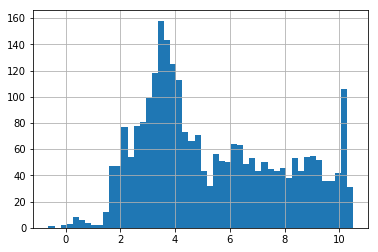

In [42]:
b.mean(1).hist(bins=50);

In [43]:
(b.mean(1)>9.75).sum() 

198

In [44]:
np.abs(b.median(1)-b.mean(1)).mean()

0.025489706878281875

In [45]:
b.mean(1).mean(),b.median(1).mean()

(5.400144072154638, 5.4109173859986495)

In [46]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub203_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [47]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub203_a11.csv".format('median'))
p.to_csv(fname,index=None)